In [13]:
import numpy as np
import matplotlib.pyplot as plt

def fprim_right(f, x, h) -> float:
    return (f(x + h) - f(x)) / h

def fprim_mid(f, x, h) -> float:
    return (f(x + h) - f(x - h)) / (2*h)

fprim_EXACT = 1 + np.tan(1)**2
fbis_EXACT = 2 * np.tan(1) * fprim_EXACT
ftris_EXACT = 2 * fprim_EXACT + 6 * fprim_EXACT * np.tan(1)**2


if __name__ == '__main__':
    approx_right = []
    approx_mid = []
    for k in range(17):
        h = np.float64()
        h = 10**-k
        approx_right.append(fprim_right(np.tan, 1, h))
        approx_mid.append(fprim_mid(np.tan, 1, h))

    results = [(k, approx_right[k], approx_mid[k], fprim_EXACT) for k in range(17)]
    for r in results:
        print(f"k: {r[0]}, right: {r[1]}, mid: {r[2]}, exact: {r[3]}")

k: 0, right: -3.742447587916421, mid: -1.0925199316307594, exact: 3.42551882081476
k: 1, right: 4.0735193259375, mid: 3.5230071984915656, exact: 3.42551882081476
k: 2, right: 3.4798299564668067, mid: 3.426464160083409, exact: 3.42551882081476
k: 3, right: 3.430863217312341, mid: 3.4255282713434587, exact: 3.42551882081476
k: 4, right: 3.4260524082818655, mid: 3.425518915318726, exact: 3.42551882081476
k: 5, right: 3.4255721710785276, mid: 3.425518821764672, exact: 3.42551882081476
k: 6, right: 3.4255241554426163, mid: 3.4255188207099607, exact: 3.42551882081476
k: 7, right: 3.425519354838258, mid: 3.425518820820983, exact: 3.42551882081476
k: 8, right: 3.4255188463561126, mid: 3.425518813049422, exact: 3.42551882081476
k: 9, right: 3.4255189795828755, mid: 3.425518868560573, exact: 3.42551882081476
k: 10, right: 3.425517647315246, mid: 3.4255187575382706, exact: 3.42551882081476
k: 11, right: 3.4255043246389505, mid: 3.4255154268691967, exact: 3.42551882081476
k: 12, right: 3.425704164

### Błąd dla różnicy prawostronnej:
$E(h) \leq \frac{Mh}{2} + \frac{2ϵ}{h}$

$h_{min} = 2\sqrt{\frac{ϵ}{M}}$

### Błąd dla różnicy centralnej
$E(h) \leq \frac{Mh^2}{6} + \frac{ϵ}{h}$

$h_{min} = \sqrt[3]{\frac{3ϵ}{M}}$

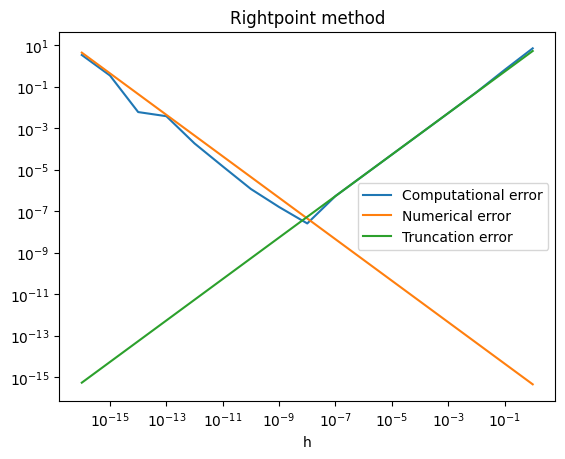

In [14]:
# wartość z wikipedii dla 64-bitowego floata
machine_epsilon = np.float64(2**-52)


plt.title("Rightpoint method")

plt.plot([10**-k for k in range(17)], [abs(x - fprim_EXACT) for x in approx_right],
         [10**-k for k in range(17)], [2* machine_epsilon/10**-k for k in range(17)],
         [10**-k for k in range(17)], [fbis_EXACT * 10**-k / 2 for k in range(17)])
plt.legend(["Computational error", "Numerical error", "Truncation error"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.show()

In [15]:
#hmin wyznaczone empirycznie
k_r = (min(results, key=lambda x: abs(x[1]-x[3])))[0]
hmin_r = 10**-k_r
print(hmin_r)

#hmin wyznaczone analitycznie
print(2*(machine_epsilon/fbis_EXACT)**(1/2))

1e-08
9.123695225180451e-09


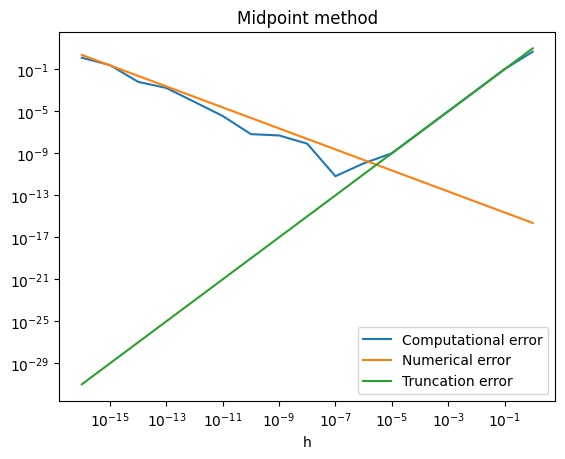

In [16]:
plt.title("Midpoint method")

plt.plot([10**-k for k in range(17)], [abs(x - fprim_EXACT) for x in approx_mid],
         [10**-k for k in range(17)], [machine_epsilon/10**-k for k in range(17)],
         [10**-k for k in range(17)], [ftris_EXACT * (10**-k)**2 / 6 for k in range(17)])
plt.legend(["Computational error", "Numerical error", "Truncation error"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.show()

In [17]:
#hmin wyznaczone empirycznie
k_m = (min(results, key=lambda x: abs(x[2]-x[3])))[0]
hmin_m = 10**-k_m
print(hmin_m)

#hmin wyznaczone analitycznie
print((3*machine_epsilon/ftris_EXACT)**(1/3))

1e-07
2.2732741568390634e-06


### Wartości błędu $E(h_{min})$ wyznaczone empirycznie

In [ ]:
print(f"Błąd dla różnicy prawostronnej: {abs(results[k_r][1] - results[k_r][3])}")

print(f"Błąd dla różnicy centralnej: {abs(results[k_m][2] - results[k_m][3])}")

Błąd dla różnicy prawostronnej: 2.554135258847623e-08
Błąd dla różnicy centralnej: 6.2230220976289274e-12


### Wniosek z rozważań

Empirycznie wyznaczony błąd obliczeniowy jest mniejszy w przypadku przybliżania pochodnej metodą różnic centralnych, więc jest to dokładniejsza metoda.